## *Bankers in the Ivory Tower*
### By Charlie Eaton

### Figure 5.2: Total enrollment in millions by ownership type

In [1]:
*ssc install blindschemes
*ssc install dubois

In [2]:
/*
copy "https://github.com/HigherEdData/Private-Equity-and-For-Profit-Colleges-as-Agile-Predators/raw/master/agilepredatorsdata20191116.csv" ///
data/agilepredatorsdata20191116.csv, replace
*/

In [3]:
qui {
    insheet using data/agilepredatorsdata20191116.csv, comma clear
drop if year<1989 | year>2015
keep if owner_pe=="Private equity" | owner_pe=="Publicly traded" | owner_pe=="Privately held"
gen peyear=year if owner_pe=="Private equity"
bysort unitid: egen maxypeyr=max(peyear)
replace owner_pe="Taken public by PE" if owner_pe=="Publicly traded" & year>maxypeyr
replace owner_pe="Other publicly traded" if owner_pe=="Publicly traded"
}

In [4]:
collapse (sum) total_enrollment, by(owner_pe year)

In [5]:
encode owner_pe, gen(owner_pes)

In [6]:
replace total_enrollment=total_enrollment/1000000

(106 real changes made)


In [7]:
drop owner_pe
qui reshape wide total_enrollment, i(year) j(owner_pes)

In [8]:
label var total_enrollment1 "Other publicly traded"
label var total_enrollment2 "Private equity"
label var total_enrollment3 "Privately held"
label var total_enrollment4 "Taken public by PE"

In [9]:
qui replace total_enrollment2= total_enrollment3 + total_enrollment2
qui replace total_enrollment4= total_enrollment2 + total_enrollment4
qui replace total_enrollment1= total_enrollment4 + total_enrollment1

## Create for-profit enrollment overtime using two-way

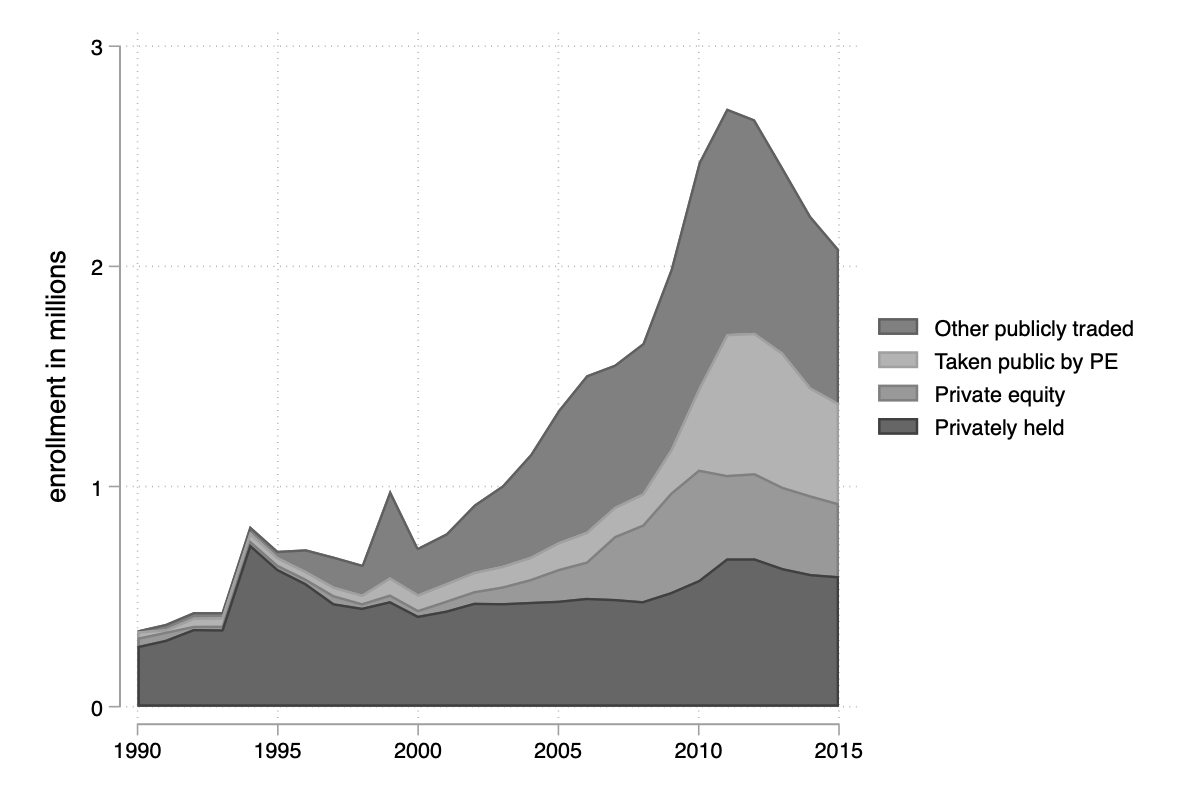




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 5 - The Bottom -
    For-Profits/figures/f5_2_enrollment_sum_by_owner.pdf saved as PDF format


In [10]:
graph tw (area total_enrollment1 total_enrollment4 total_enrollment2 total_enrollment3 year) if year>1989, ///
legend(cols(1) position(3)) scheme(plotplain) ytitle(enrollment in millions) xtitle("")
graph export figures/f5_2_enrollment_sum_by_owner.pdf, replace

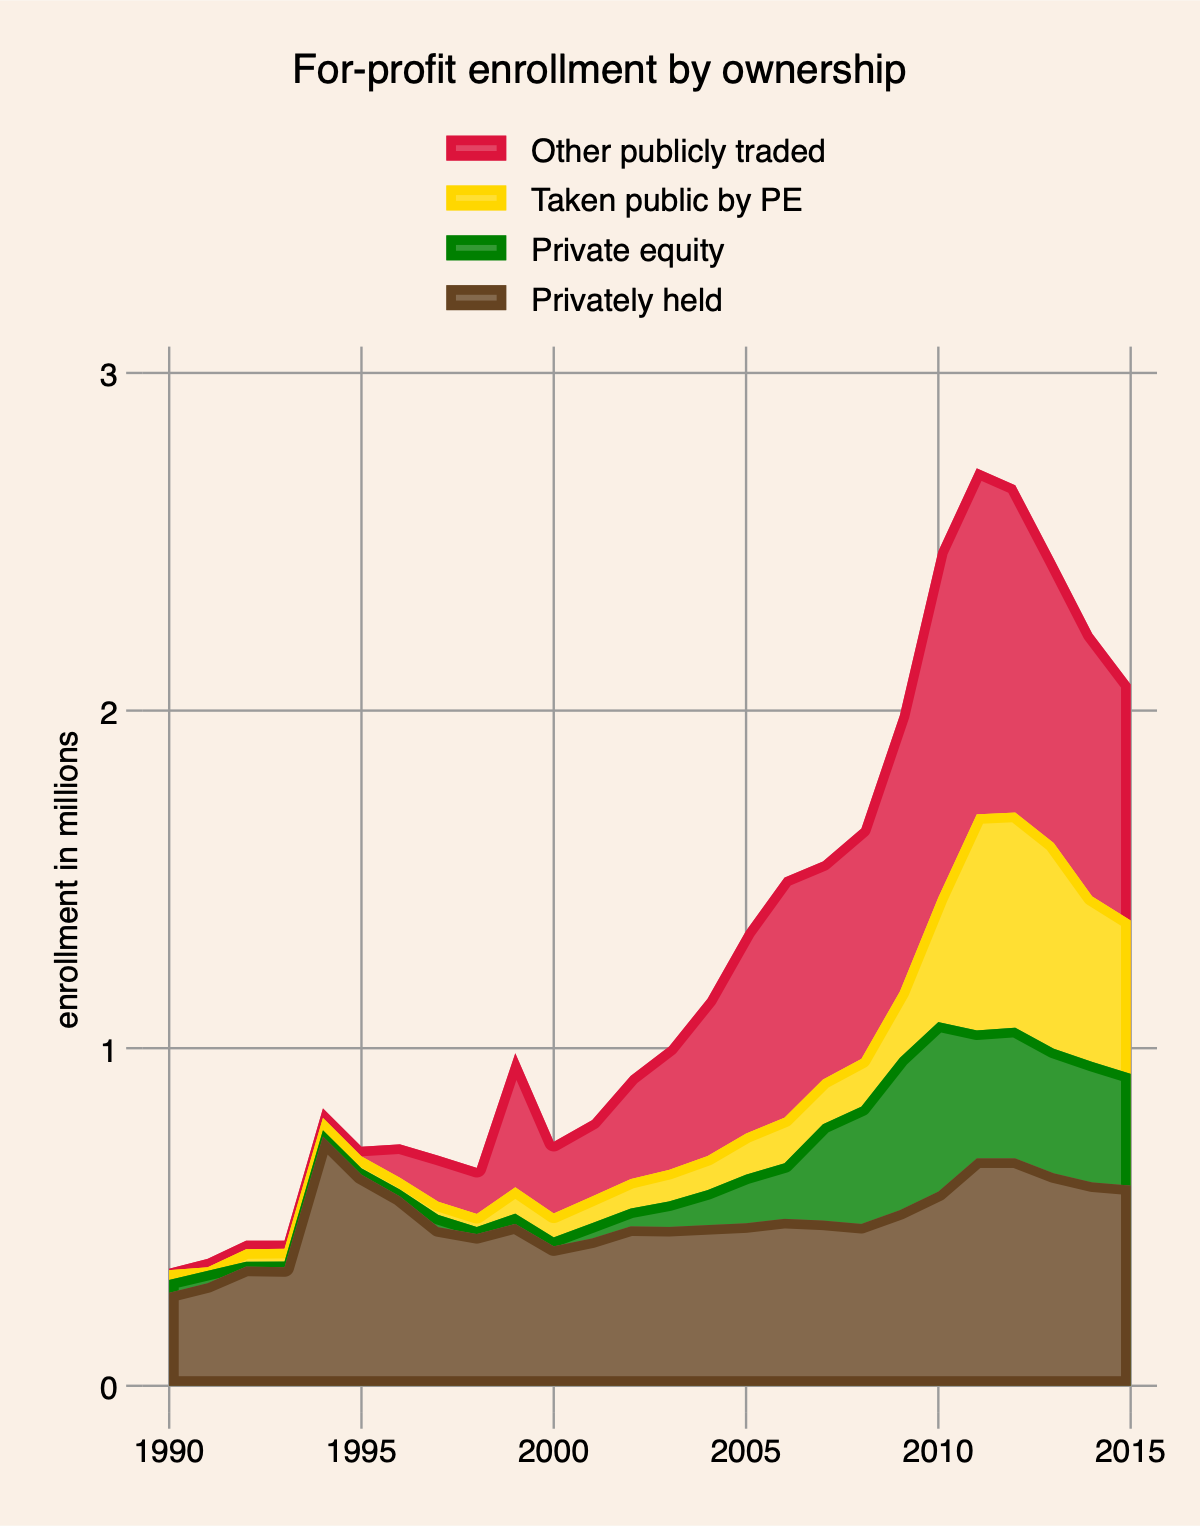

In [11]:
graph tw (area total_enrollment1 total_enrollment4 total_enrollment2 total_enrollment3 year) if year>1989, legend(cols(1) position(12)) ///
title(For-profit enrollment by ownership) scheme(dubois) ytitle(enrollment in millions) xtitle("")
*graph export f5_2_bankersenrollbyownerdubois.pdf, replace

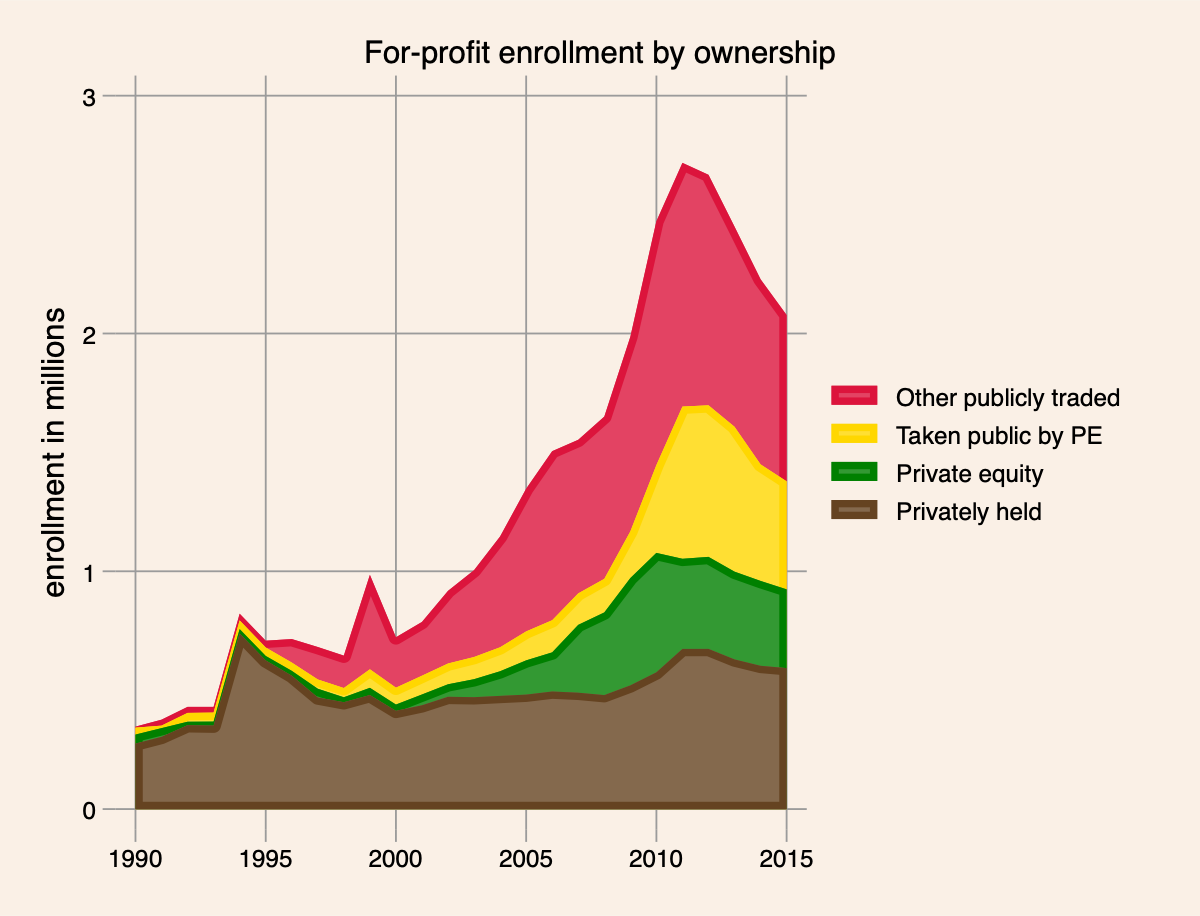




file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 5 - The Bottom -
    For-Profits/figures/f5_2_bankersenrollbyownerdubois.pdf saved as PDF
    format


In [12]:
graph tw (area total_enrollment1 total_enrollment4 total_enrollment2 total_enrollment3 year) if year>1989, legend(cols(1) position(3)) ///
title(For-profit enrollment by ownership) scheme(dubois) ytitle(enrollment in millions, size(medsmall)) xtitle("") xsize(10)
graph export figures/f5_2_bankersenrollbyownerdubois.pdf, replace

In [13]:
graph export figures/f5_2_bankersenrollbyownerduboiswide.pdf, replace

file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 5 - The Bottom -
    For-Profits/figures/f5_2_bankersenrollbyownerduboiswide.pdf saved as PDF
    format
